In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('Code Modules','#3636ff')

In [2]:
import numpy as np,sympy as sp
import pandas as pd,pylab as pl
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

In [3]:
dhtml('Let Us Be Serious in Function Plotting','#3636ff')

In [4]:
def taylor_approx(exp,x0=None,orders=(2,5),
                  figs=(11,4),num=200,
                  xlim=(0,1),ylim=None):
    if not callable(exp):
        raise ValueError(
            'the function must be callable')
    if isinstance(xlim,(list,tuple)):
        x=np.linspace(float(xlim[0]),
                      float(xlim[1]),num)
    else:
        x=xlim
    if x0 is None: x0=x[0]
    xs=sp.Symbol('x'); fx=exp(xs); apps={}
    f=sp.lambdify(xs,fx,modules=['numpy'])
    pl.figure(figsize=figs)
    pl.plot(x,f(x),label=str(fx),lw=2)
    for order in orders:
        app=fx.series(xs,x0,n=order).removeO()
        apps[order]=app
        if isinstance(app,sp.numbers.Number):
            y=np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa=sp.lambdify(xs,app,modules=['numpy'])
            y=fa(x)
        lbl=sp.latex(app).replace('$','')
        pl.plot(x,y,label=r'$n=%s:\, %s$'%(order,lbl))
    if ylim is not None:
        pl.ylim(*ylim)
    pl.legend(loc='best',fontsize=15)\
    .get_frame().set_alpha(.8)
    pl.grid(); pl.tight_layout(); pl.show()

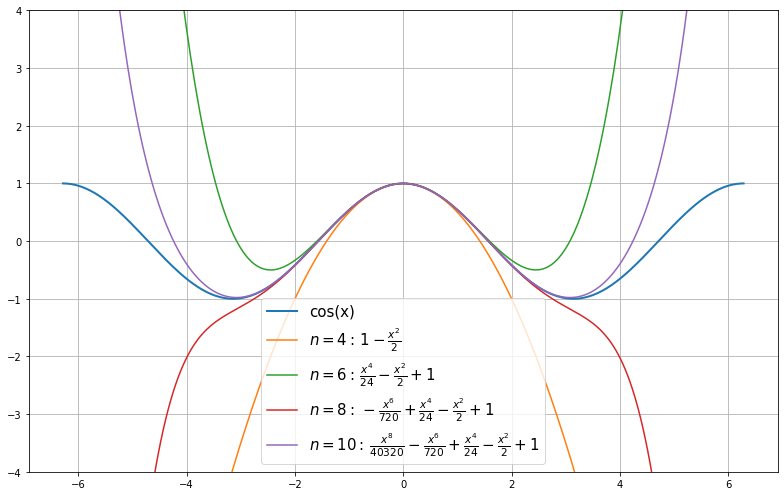

In [5]:
taylor_approx(sp.cos,0,[4,6,8,10],(11,7),300,
              (-2*sp.pi,2*sp.pi),(-4,4))

In [6]:
dhtml('Don`t Tell Me That You Don`t Like This',
      '#3636ff')

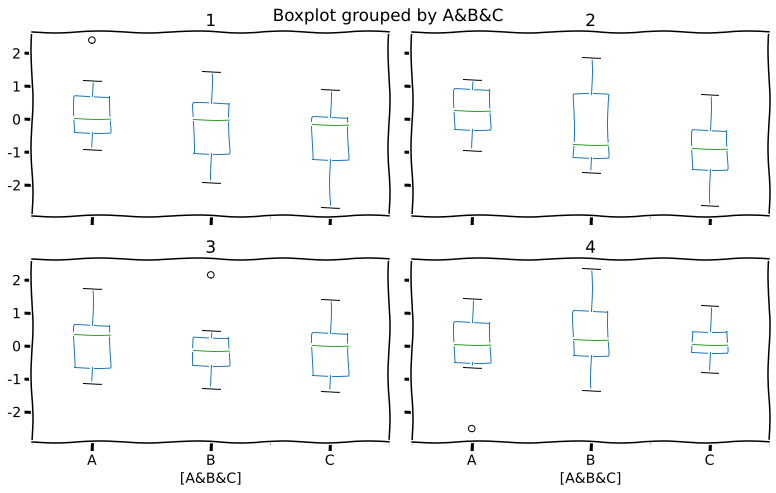

In [7]:
pl.xkcd()
df=pd.DataFrame(np.random.randn(30,4),
                columns=['1','2','3','4'])
df['A&B&C']=pd.Series(
    10*['A']+10*['B']+10*['C'])
df.boxplot(by='A&B&C',figsize=(11,7))
pl.tight_layout();

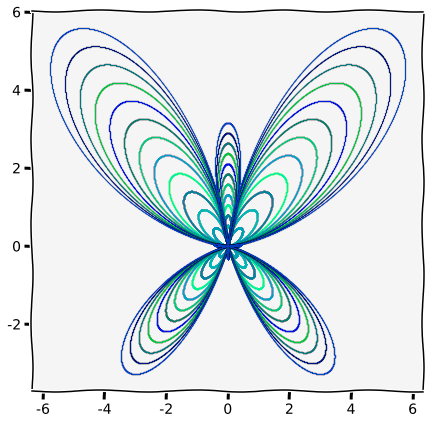

In [8]:
pi=np.pi 
t=np.arange(0,2*pi,.1**4)
def col(): 
    return [np.append([0],np.random.random(2))]
def f(t): 
    return np.exp(np.cos(t)**2+np.sin(t))-3*np.cos(4*t)
def fx(k,t): 
    return .1*(k+1)*f(t)*np.cos(t)
def fy(k,t): 
    return .1*(k+1)*f(t)*np.sin(t)
pl.figure(figsize=(7,7))
ax=pl.gca(); ax.set_facecolor('whitesmoke')
[pl.scatter(fx(i,t),fy(i,t),s=.1**3,c=col()) 
 for i in range(12)];  

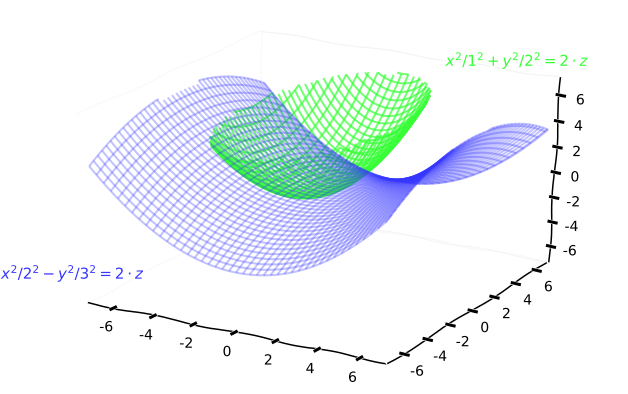

In [9]:
from mpl_toolkits.mplot3d import Axes3D
f=pl.figure(figsize=(11,7))
ax=f.add_subplot(111,projection='3d')
X=np.linspace(-7,7,128); X,Y=np.meshgrid(X,X)
Z1=1/2*X**2+1/8*Y**2; Z1[Z1>6]=np.nan
Z2=1/8*X**2-1/18*Y**2
Z2[Z2<-6]=np.nan; Z2[Z2>6]=np.nan
label1='$x^2/1^2+y^2/2^2=2 \cdot z$'
label2='$x^2/2^2-y^2/3^2=2 \cdot z$'
ax.plot_wireframe(X,Y,Z1,alpha=.7,
                  colors='#36ff36')
ax.plot_wireframe(X,Y,Z2,alpha=.3,
                  colors='#3636ff')
ax.text(2,7,7,label1,
        color='#36ff36',fontsize=15)
ax.text(-12,-7,-7,label2,
        color='#3636ff',fontsize=15)
ax.xaxis.pane.fill,ax.yaxis.pane.fill,\
ax.zaxis.pane.fill=False,False,False
ax.set_xlim(-7,7)
ax.set_ylim(-7,7); ax.set_zlim(-7,7);

In [10]:
dhtml('In Progress','#3636ff')